In [39]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
sym.init_printing()

In [41]:
class var():
    def __init__(self, str):
        self.s = sym.Symbol(str)
        self.v = None

首先，利用$EFL = 100$以及$c_1 = -c_2$联立求解出$c_1$和$c_2$的值。

In [42]:
x = var('x')
K = var('K')
n = var('n')
d = var('d')
apt_d = var('AD')
mu = n
c1, c2 = var('c_1'), var('c_2')
R1, R2 = var('R_1'), var('R_2')
K1, K2 = var('K_1'), var('K_2')
delta, delta_P = var('delta'), var('\delta^{\prime}')

K.v = 1/100.0
n.v = 1.5168
d.v = 7.2
apt_d.v = 30

In [43]:
def eq1(get_val=False): return c1.s + c2.s if get_val else c1.s + c2.s

def eq2(get_val=False): return K.v - (n.v - 1)*(c1.s - c2.s) - (d.v/mu.v)*c1.s*c2.s*(mu.v - 1)**2 if get_val \
else K.s - (n.s - 1)*(c1.s - c2.s) - (d.s/mu.s)*c1.s*c2.s*(mu.s - 1)**2

def eq2(get_val=False): return K.v - (n.v - 1)*(c1.s - c2.s) - (d.v/mu.v)*c1.s*c2.s*(mu.v - 1)**2 if get_val \
else K.s - (n.s - 1)*(c1.s - c2.s) - (d.s/mu.s)*c1.s*c2.s*(mu.s - 1)**2

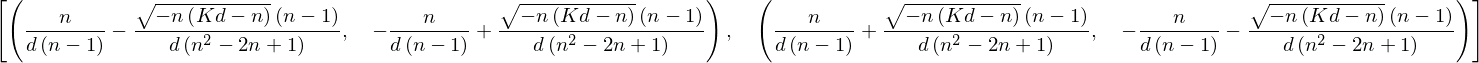

In [44]:
sym.solve([eq1(), eq2()], [c1.s, c2.s])

In [45]:
c1.v, c2.v = (sym.solve([eq1(True), eq2(True)], [c1.s, c2.s]))[0]
print(c1.v, c2.v)

0.00979254439042120 -0.00979254439042120



下面求解主面的位置。利用公式:

$$\normalsize \delta^{\prime} = \frac{-n^{\prime}  d  K_1}{\mu  K}$$
以及
$$\normalsize \delta          = \frac{ n           d  K_2}{\mu  K}$$
求解可得：

In [75]:
K1.v = c1.v*(n.v - 1)
K2.v = c2.v*(1-n.v)

delta_P.v = -(d.v*K1.v)/(mu.v*K.v)
delta.v   = (d.v*K2.v)/(mu.v*K.v)


以像方主面与光轴的交点$P^{\prime}$为坐标原点，即: $O = P^{\prime}$。并建立直角坐标系。下面求圆心$C_1$和$C_2$的位置。设透镜与光轴的两个交点从左到右依次为$Q，Q^{\prime}$，那么有: $QQ^{\prime} = d$。

圆心$C_1$的坐标为:
$$C_1(P^{\prime}C_1, 0)$$
其中，

$$
\begin{align}
P^{\prime}C_1  &= P^{\prime}Q^{\prime} + Q^{\prime}Q + QC_1\\
               &= -\delta^{\prime} - d + R_1\\
               &= R_1 -\delta^{\prime} - d
\end{align}
$$
      
圆心$C_2$的坐标为:
$$C_2(P^{\prime}C_2, 0)$$
其中，

$$
\begin{align}
P^{\prime}C_2  &= P^{\prime}Q^{\prime} + Q^{\prime}C_2^{\prime}\\
               &= -\delta^{\prime}+ R_2\\
               &= R_2 -\delta^{\prime}
\end{align}
$$

在这里，$R_2$小于零。

In [76]:
C1, C2 = var('C_1'), var('C_2')
R1.v = 1/c1.v
R2.v = 1/c2.v
C1.v = R1.v - delta_P.v - d.v
C2.v = R2.v - delta_P.v

print(C1.v, C2.v)

97.3207779667135 -99.7162334025018


In [77]:
theta = var('theta')
def eq1(get_sym=True): return R1.s*sym.sin(theta.s) - apt_d.s/2 if get_sym \
    else R1.v*sym.sin(theta.s) - apt_d.v/2

def eq2(get_sym=True): return R1.s*sym.sin(theta.s) + apt_d.s/2 if get_sym \
    else R1.v*sym.sin(theta.s) + apt_d.v/2

In [78]:
sym.solve(eq1(), theta.s)

[-asin(AD/(2*R_1)) + pi, asin(AD/(2*R_1))]

In [79]:
sym.solve(eq2(), theta.s)

[asin(AD/(2*R_1)) + pi, -asin(AD/(2*R_1))]

In [80]:
sym.solve(eq1(False), theta.s)

[0.147421574370244, 2.99417107921955]

In [81]:
sym.solve(eq2(False), theta.s)

[-0.147421574370244, 3.28901422796004]

In [82]:
_, theta_lower = sym.solve(eq1(False), theta.s)
_, theta_upper = sym.solve(eq2(False), theta.s)
theta_lower = float(theta_lower)
theta_upper = float(theta_upper)

In [83]:
x0 = var('x_0')
y0 = var('y_0')
expr = sym.sqrt(R1.s**2 - (x0.s - C1.s)**2)
sym.diff(expr, x0.s)

(C_1 - x_0)/sqrt(R_1**2 - (-C_1 + x_0)**2)

In [84]:
y0.v = float(15)
x0.v = C1.v - np.sqrt(float(R1.v**2 - y0.v**2))
slope_1 = (C1.v - x0.v)/np.sqrt(float(R1.v**2 - (-C1.v + x0.v)**2))
print(slope_1)

6.73405580389948


由几何关系知，入射角$i_{1}$可以通过如下公式计算：
$$
sini_{1} = \frac{1}{\sqrt{1 + slope_{1}^{2}}}
$$
而$slope_{1}$就是图中切线的斜率，刚刚已经求得。


由折射定律可求得第一次折射的折射角$i^{'}_{1}$:
$$
sini_{1} = nsini^{'}_{1}
$$

In [85]:
# sini1 = 1/np.sqrt(float('%0.10f'%(1 + slope_1**2)))

In [86]:
i1   = np.arcsin(float(y0.v/R1.v))
i1_P = np.arcsin(float(y0.v/R1.v)/n.v)

In [87]:
theta_1 = i1_P - i1

In [88]:
slope_2 = np.tan(theta_1)

In [89]:
x1 = var('x_1')
y1 = var('y_1')

In [90]:
def eq(): return sym.sqrt(-(x.s - C2.s)**2 + R2.s**2) - \
(slope_2*(x.s - x0.s) + y0.s)

In [91]:
sym.solve(eq(), x.s)

[0.997459097086168*C_2 + 0.00254090291383237*x_0 + 0.0503432887902137*y_0 - 9.97459097086168e-17*sqrt(-2.54737554778437e+29*C_2**2 + 5.09475109556873e+29*C_2*x_0 + 1.00943064106146e+31*C_2*y_0 + 1.00254737554778e+32*R_2**2 - 2.54737554778437e+29*x_0**2 - 1.00943064106146e+31*x_0*y_0 - 1.0e+32*y_0**2), 0.997459097086168*C_2 + 0.00254090291383237*x_0 + 0.0503432887902137*y_0 + 9.97459097086168e-17*sqrt(-2.54737554778437e+29*C_2**2 + 5.09475109556873e+29*C_2*x_0 + 1.00943064106146e+31*C_2*y_0 + 1.00254737554778e+32*R_2**2 - 2.54737554778437e+29*x_0**2 - 1.00943064106146e+31*x_0*y_0 - 1.0e+32*y_0**2)]

In [92]:
def eq(): return sym.sqrt(-(x.s - C2.v)**2 + R2.v**2) - \
(slope_2*(x.s - x0.v) + y0.v)

In [93]:
x1.v = sym.solve(eq(), x.s)[1]
y1.v = slope_2*(x1.v - x0.v) + y0.v

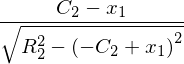

In [94]:
sym.init_printing()
expr = sym.sqrt(R2.s**2 - (x1.s - C2.s)**2)
sym.diff(expr, x1.s)

In [95]:
sym.init_printing(pretty_print=False)
expr = sym.sqrt(R2.s**2 - (x1.s - C2.s)**2)
sym.diff(expr, x1.s)

(C_2 - x_1)/sqrt(R_2**2 - (-C_2 + x_1)**2)

In [96]:
slope_3 = (C2.v - x1.v)/np.sqrt(float(R2.v**2 - (-C2.v + x1.v)**2))
print(slope_3)

-6.85233274713594


In [97]:
# 第二个折射面的入射角
theta_2 = -theta_1 + np.arctan(float(-1/slope_3))

In [98]:
# 第二个折射面的折射角
theta_2P = np.arcsin(n.v*np.sin(theta_2))

In [99]:
np.arctan(float(-1/slope_3)) - theta_2P

-0.15392870848008364

In [100]:
# 经由第二个折射面折射所得的光线的斜率
slope = np.tan(np.arctan(float(-1/slope_3)) - theta_2P)

In [101]:
print(98.4747390871095 + x1.v)

99.8066573975112


In [102]:
print((slope*(100 - x1.v) + y1.v))

-0.562419043908779


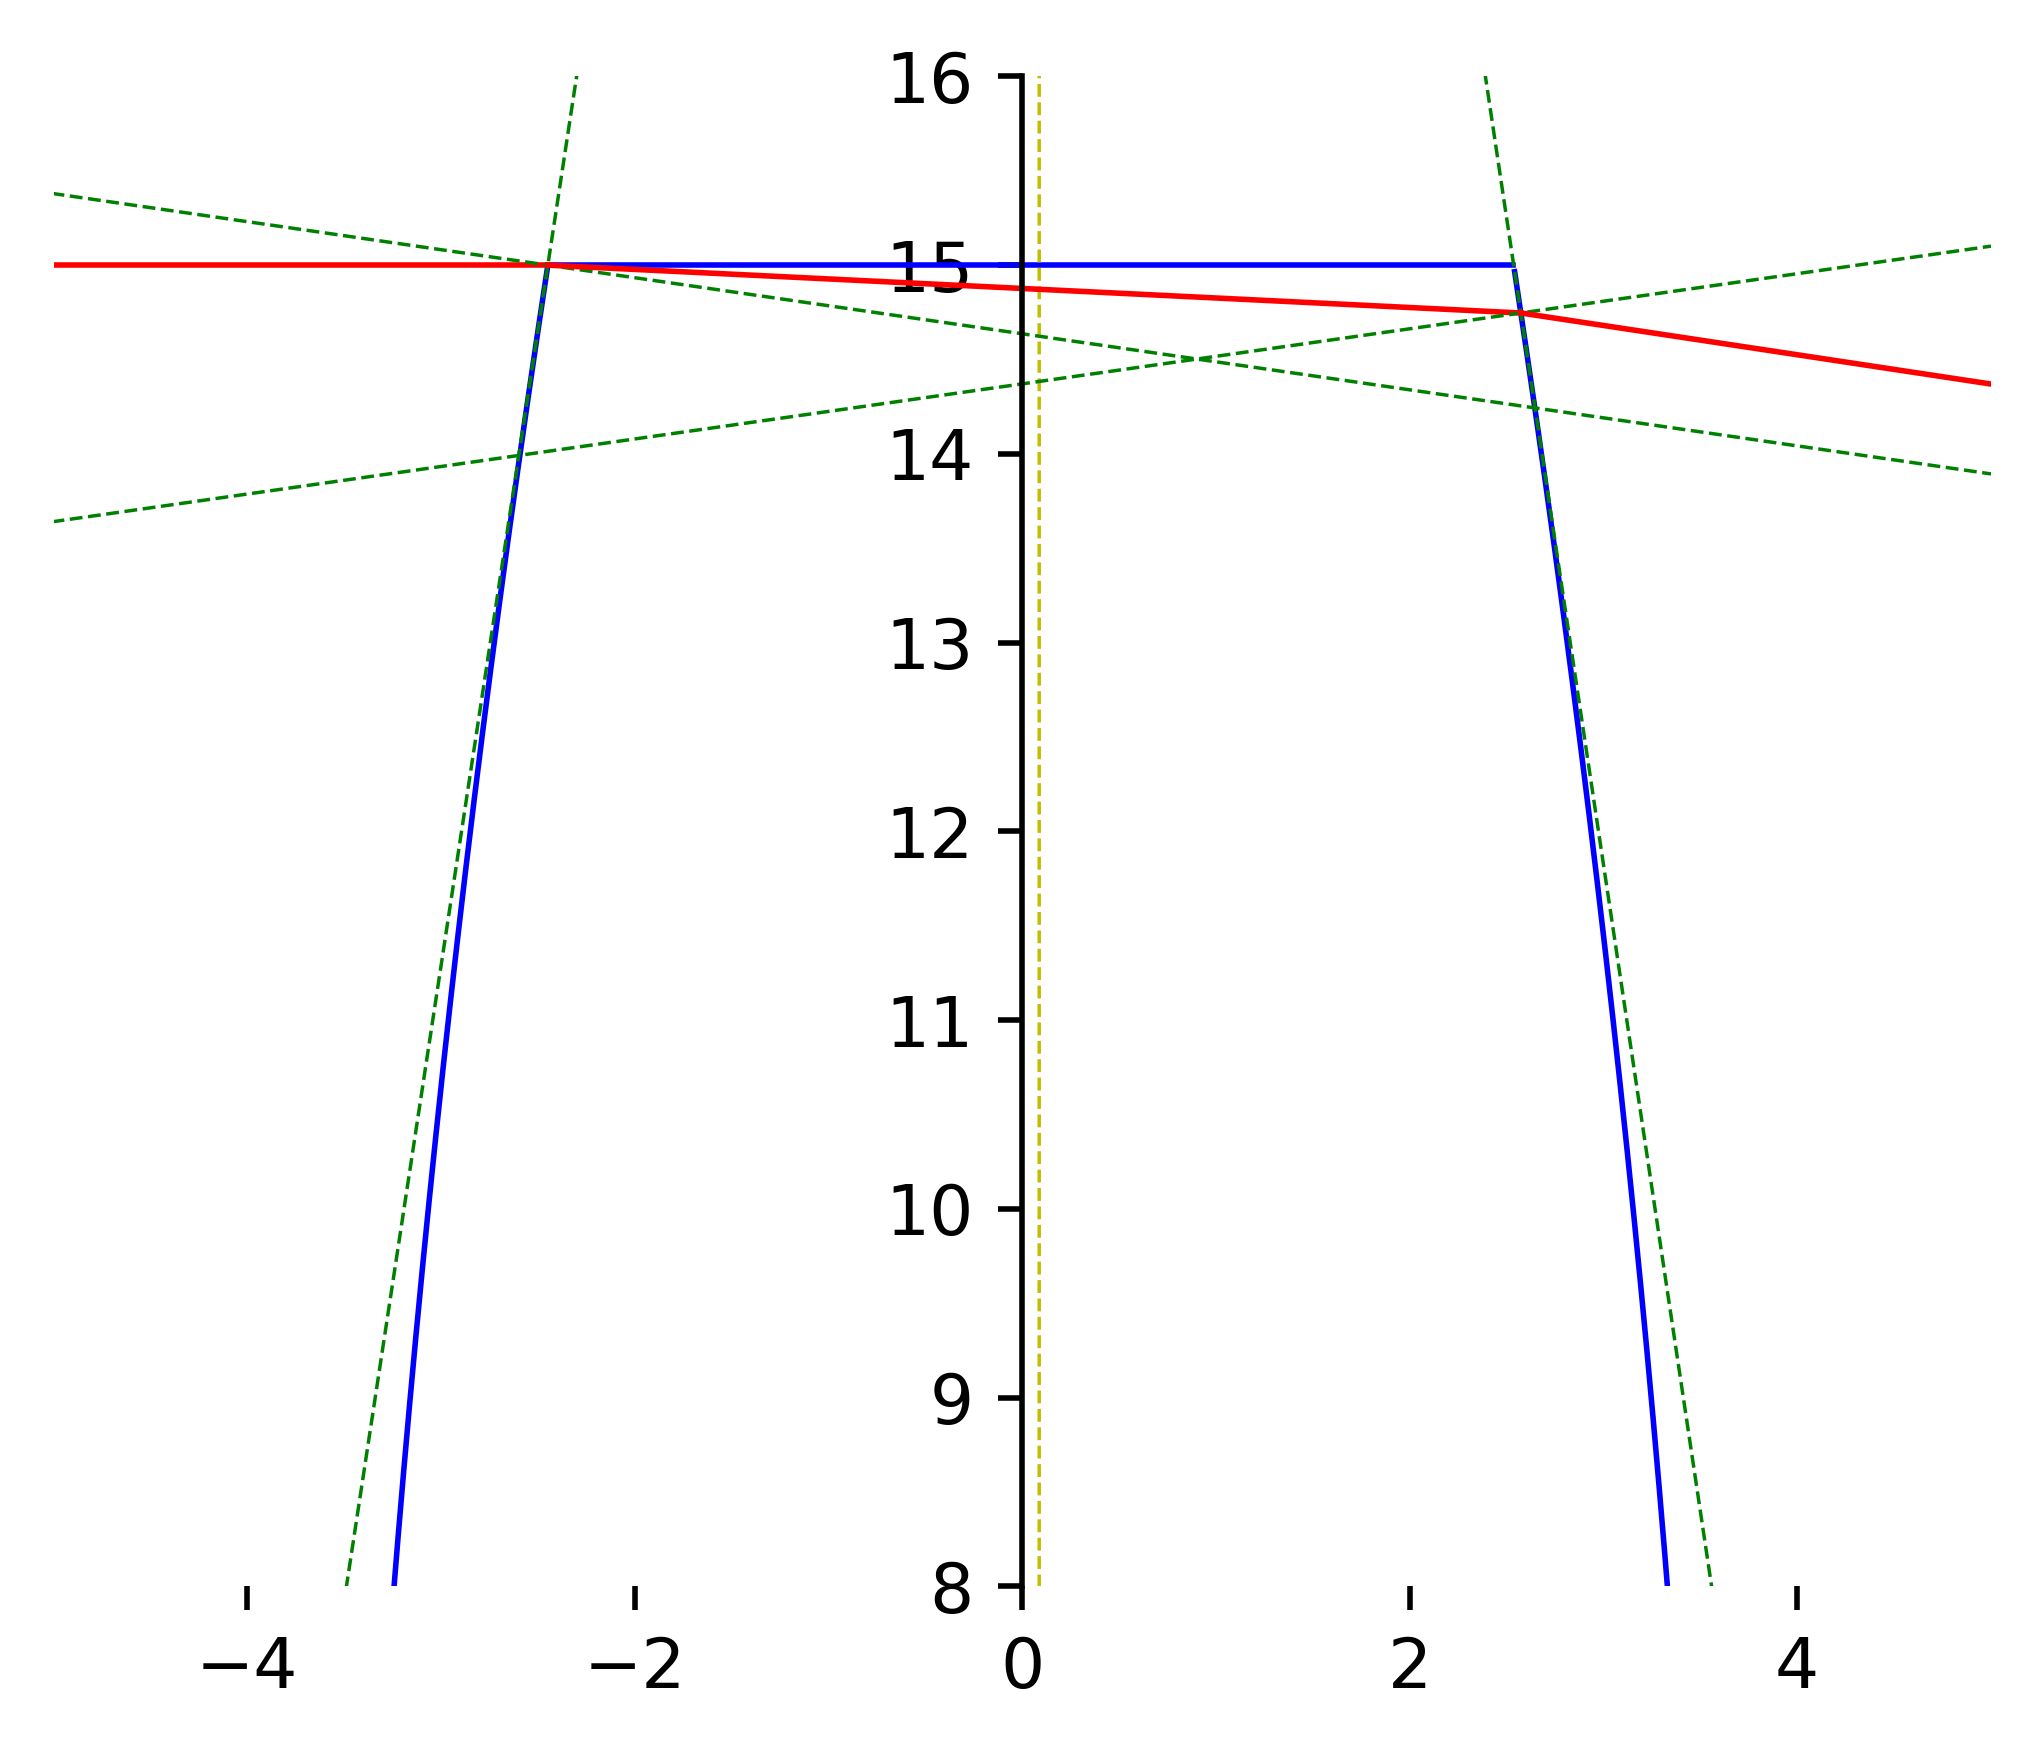

In [201]:
plt.figure(figsize=(5, 4), dpi=500)
plt.xlim((-5, 5))
plt.ylim((8, 16))

# 描述两圆的角度范围，透镜的左右面范围
ang = np.arange(theta_lower, theta_upper, 0.0005)
# 描述透镜上下底面范围
ll0 = np.arange(C1.v+ R1.v*np.cos(theta_lower), C2.v+ R2.v*np.cos(theta_lower), 0.01)
# 描述各个面切线和法线的范围，即全明面
xx0 = np.arange(-30, 30, 0.01)
# 描述入射光x取值范围
xx1 = np.arange(-30, x0.v, 0.01)
# 描述第一次折射后，折射光x的取值范围
xx1P = np.arange(x0.v, x1.v, 0.01)
# 描述第二次折射后，折射光x的取值范围
xx2 = np.arange(x1.v, 120, 0.01)

# 两圆相交所得透镜的折射面方程
plt.plot(C1.v+ R1.v*np.cos(ang), R1.v*np.sin(ang), 'b', linewidth=0.8)
plt.plot(C2.v+ R2.v*np.cos(ang), R2.v*np.sin(ang), 'b', linewidth=0.8)

# 透镜的上面和下面，由直线方程描述。
plt.plot(ll0, apt_d.v/2 + 0*ll0, 'b', linewidth=0.8)
plt.plot(ll0, -apt_d.v/2 + 0*ll0, 'b', linewidth=0.8)

# 物方主面的方程
plt.plot(-delta_P.v - d.v + delta.v + xx0*0, xx0, 'y--', linewidth=0.5)

# 入射光方程
plt.plot(xx1,  y0.v + 0*xx1, 'r', linewidth=0.8)

# 第一个折射面，入射点处，切线和法线的方程。
plt.plot(xx0, slope_1*(xx0 - x0.v) + y0.v, 'g--', linewidth=0.5)
plt.plot(xx0, (-1/slope_1)*(xx0 - x0.v) + y0.v, 'g--', linewidth=0.5)

# 发生第一次折射后，折射光的方程。
plt.plot(xx1P, slope_2*(xx1P - x0.v) + y0.v, 'r', linewidth=0.8)

# 第二个折射面，入射点处，切线和法线的方程。
plt.plot(xx0, slope_3*(xx0 - x1.v) + y1.v, 'g--', linewidth=0.5)
plt.plot(xx0, (-1/slope_3)*(xx0 - x1.v) + y1.v, 'g--', linewidth=0.5)

# 发生第二次折射后，折射光的方程。
plt.plot(xx2, slope*(xx2 - x1.v) + y1.v, 'r', linewidth=0.8)

# 设置坐标轴属性
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'  ].set_position(('data',0))

plt.show()